In [1]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [2]:
keras.backend.backend()

'tensorflow'

In [68]:
from sklearn.metrics import accuracy_score
from keras.layers import LeakyReLU

In [4]:
(train_images,train_labels),(test_images,testn_labels) = fashion_mnist.load_data()

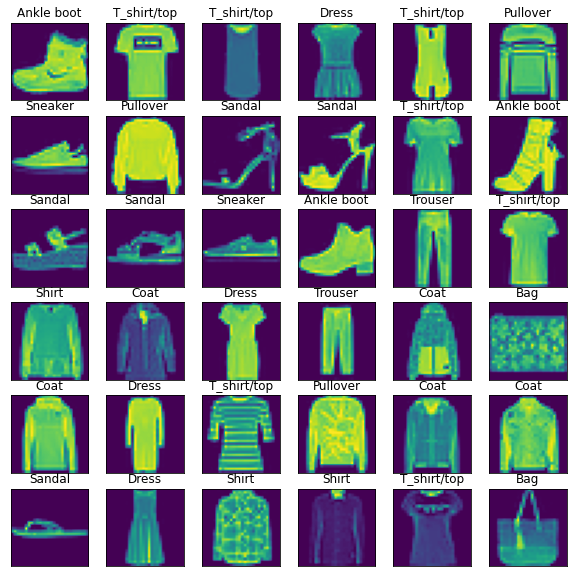

In [5]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape((28,28)))
    label_index = int(train_labels[i])
    plt.title(class_names[label_index])
plt.show()

In [6]:
x_train = train_images/255
y_train = train_labels.copy()
x_test= test_images/255
y_test=testn_labels.copy()

In [7]:
# Flatten the images.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

In [101]:
# Build the model.
neurons1 =[64,128]
neurons2 =[32,64]
afs=['relu']#, 'tanh', 'sigmoid']
def build_model(n1,n2, af):
    model = Sequential([Dense(n1, activation=af, input_shape=(784,)),
      Dense(n2, activation=af),
      Dense(10, activation='softmax'),])
    # Compile the model.
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'],)
    return model

In [102]:
models=[]
for n1 in neurons1:
    for n2 in neurons2:
        for af in afs:
            models.append(build_model(n1,n2, af))

In [103]:
##model.summary()

In [104]:
#from keras.utils import plot_model
#plot_model(model, to_file='model.png')

In [111]:
# Train the model.
histories=[]
predicts_accurance=[]
lepochs = [5,10]
batches_size = [32,64]
models_fe=[]
for epochs in lepochs:
    for batch_size in batches_size:
            for model in models:
                print (f'!!!!!!--- {model.name} --- epochs {epochs} batch_size {batch_size} ---')
                model.summary()
                histories.append(model.fit(x_train,to_categorical(train_labels),epochs=epochs,batch_size=batch_size))
                # Evaluate the model.
                print('Finish')
                acc = model.evaluate(x_test,to_categorical(y_test))[1]
                predicts_accurance.append(acc)
                models_fe.append(f'{model.name}_{acc}_{epochs}_{batch_size}')

!!!!!!--- sequential_121 --- epochs 5 batch_size 32 ---
Model: "sequential_121"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_365 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_366 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_367 (Dense)            (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1368 - accuracy: 0.9489
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1334 - accuracy: 0.9487
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1338 - accuracy: 0.9496
Epoch 4/5
1875/1875

938/938 [==============================] - 2s 2ms/step - loss: 0.1565 - accuracy: 0.9405
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1510 - accuracy: 0.9426
Finish
313/313 [==============================] - 0s 1ms/step - loss: 0.3864 - accuracy: 0.8886
!!!!!!--- sequential_123 --- epochs 5 batch_size 64 ---
Model: "sequential_123"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_371 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_372 (Dense)            (None, 32)                4128      
_________________________________________________________________
dense_373 (Dense)            (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
938/938 [=================

1875/1875 [==============================] - 3s 2ms/step - loss: 0.1880 - accuracy: 0.9278
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1825 - accuracy: 0.9296
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1785 - accuracy: 0.9328
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1734 - accuracy: 0.9345
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1701 - accuracy: 0.9351
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1666 - accuracy: 0.9361
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1645 - accuracy: 0.9371
Finish
313/313 [==============================] - 0s 1ms/step - loss: 0.3693 - accuracy: 0.8900
!!!!!!--- sequential_124 --- epochs 10 batch_size 32 ---
Model: "sequential_124"
_________________________________________________________________
Layer (type)                 Output Shape            

938/938 [==============================] - 3s 3ms/step - loss: 0.1172 - accuracy: 0.9555
Epoch 10/10
938/938 [==============================] - 2s 3ms/step - loss: 0.1144 - accuracy: 0.9564
Finish
313/313 [==============================] - 0s 1ms/step - loss: 0.4418 - accuracy: 0.8896
!!!!!!--- sequential_124 --- epochs 10 batch_size 64 ---
Model: "sequential_124"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_374 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_375 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_376 (Dense)            (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
938/938 [=============

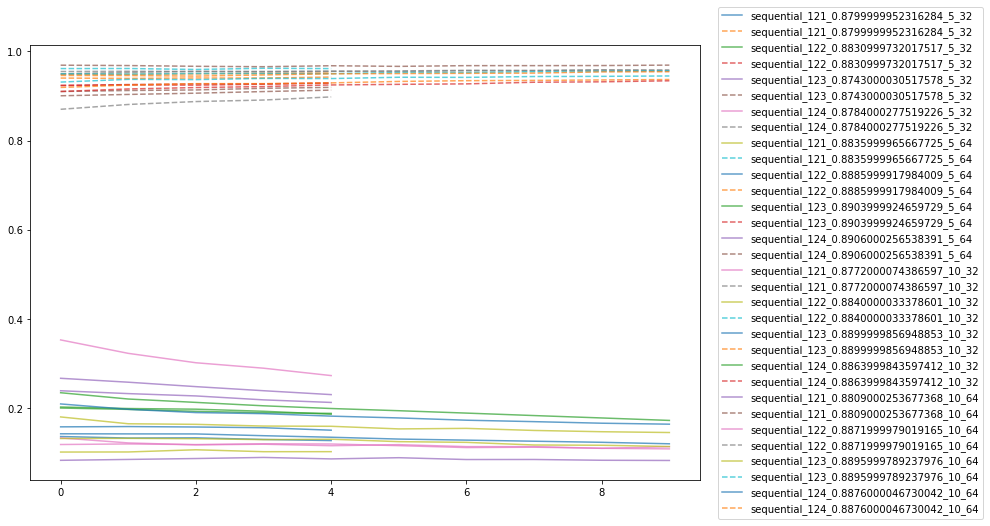

In [112]:
fig, ax = plt.subplots(figsize=(12,8))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
i = 0
for history in histories:
        ax.plot(history.history['loss'],
                linestyle='-',
                alpha=0.7,
                label=models_fe[i])
        ax.plot(history.history['accuracy'],
                linestyle='--',
                alpha=0.7,
                label=models_fe[i])
        ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))
        i +=1
plt.show()

In [113]:
models_fe

['sequential_121_0.8799999952316284_5_32',
 'sequential_122_0.8830999732017517_5_32',
 'sequential_123_0.8743000030517578_5_32',
 'sequential_124_0.8784000277519226_5_32',
 'sequential_121_0.8835999965667725_5_64',
 'sequential_122_0.8885999917984009_5_64',
 'sequential_123_0.8903999924659729_5_64',
 'sequential_124_0.8906000256538391_5_64',
 'sequential_121_0.8772000074386597_10_32',
 'sequential_122_0.8840000033378601_10_32',
 'sequential_123_0.8899999856948853_10_32',
 'sequential_124_0.8863999843597412_10_32',
 'sequential_121_0.8809000253677368_10_64',
 'sequential_122_0.8871999979019165_10_64',
 'sequential_123_0.8895999789237976_10_64',
 'sequential_124_0.8876000046730042_10_64']

In [114]:
predicts_accurance

[0.8799999952316284,
 0.8830999732017517,
 0.8743000030517578,
 0.8784000277519226,
 0.8835999965667725,
 0.8885999917984009,
 0.8903999924659729,
 0.8906000256538391,
 0.8772000074386597,
 0.8840000033378601,
 0.8899999856948853,
 0.8863999843597412,
 0.8809000253677368,
 0.8871999979019165,
 0.8895999789237976,
 0.8876000046730042]

In [ ]:
Лучший результат  0.8906000256538391_5_64

1. Видим что с большим числом  эпох на test теряем качество - переобучаемся <br>
2. Добавлял слои, есть прирост качества, но не сохранил рез. <br>
3. Увеличили кол-во нейронов  - снижение результата<br>
4. batch  принципиально не повлиял <br>